#**Class N°10: KDD and Exploratory data Analysis**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Gerando dados aleatórios de minutos de treino em um mês para plotar um histograma:

Vamos gerar um mês(30 valores), cada um com até 60 minutos

In [14]:
minutos = np.random.randint(0,60,30) #(valor_randomico_minimo, valor_randomico_maximo, quantidade de valores randomicos que vão ser gerados)

In [15]:
minutos

array([17, 38, 40, 12, 58,  0, 44,  8, 12, 59, 49,  9,  2, 23, 40, 39, 15,
       47, 44, 20, 24, 34, 36, 18, 50, 44, 43, 42,  2, 21], dtype=int32)

Um histograma é um gráfico de distribuição:

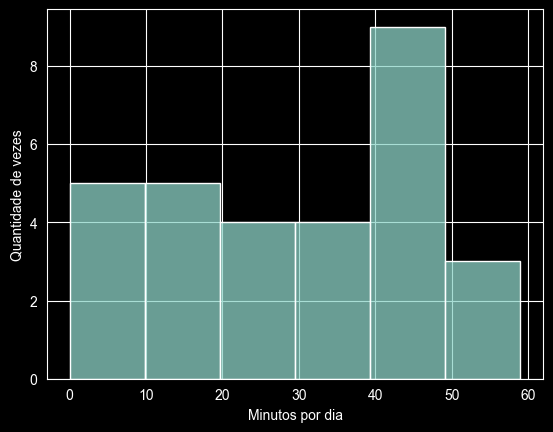

In [16]:
ax=sns.histplot(minutos)
ax.set(xlabel='Minutos por dia', ylabel='Quantidade de vezes')
plt.show()

#**Análise Exploratória de Dados**

**Utilizando biblioteca nova para EDA chamada Sweetviz (E consertando erro de classe esperada do numpy pelo Sweetviz**

In [ ]:
import sweetviz
import warnings

# Workaround for numpy >= 1.25.0 incompatibility with sweetviz
# numpy.VisibleDeprecationWarning was removed in numpy 1.25.0
# sweetviz 2.x expects it to exist.
if not hasattr(np, 'VisibleDeprecationWarning'):
    class VisibleDeprecationWarning(UserWarning):
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning

In [18]:
arquivo = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv'

In [19]:
dados = pd.read_csv(arquivo)
dados

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0096,Tokyo Olympics,Hard,64,A,20210724,237,126207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1228.0,71.0,996.0
1,2021-0096,Tokyo Olympics,Hard,64,A,20210724,238,105526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1410.0,95.0,829.0
2,2021-0096,Tokyo Olympics,Hard,64,A,20210724,239,111576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,160.0,471.0,197.0,354.0
3,2021-0096,Tokyo Olympics,Hard,64,A,20210724,240,105357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1476.0,61.0,1106.0
4,2021-0096,Tokyo Olympics,Hard,64,A,20210724,241,207830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,145.0,525.0,137.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,2021-9210,Laver Cup,Hard,8,A,20210924,102,126610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5173.0,11.0,3368.0
2729,2021-9210,Laver Cup,Hard,8,A,20210924,103,106421,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10575.0,12.0,3310.0
2730,2021-9210,Laver Cup,Hard,8,A,20210924,104,126094,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6130.0,15.0,2800.0
2731,2021-9210,Laver Cup,Hard,8,A,20210924,105,100644,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7760.0,22.0,2171.0


In [ ]:
eda=sweetviz.analyze(dados) #Usando o método analyze(para criar o relatório de análise) do sweetviz e passando um dataframe como parâmetro
eda.show_html('SWEETVIZ_REPORT.html') #Método para criar um arquivo HTML instalável do nosso relatório

Esse arquivo criado pelo sweetviz, precisa ser baixado(na aba de arquivos ao lado) e em seguida aberto no navegador. Ele me provê um relatório estatístico dos dados, com porcentagens, gráficos e comparações,como mostrado logo abaixo:

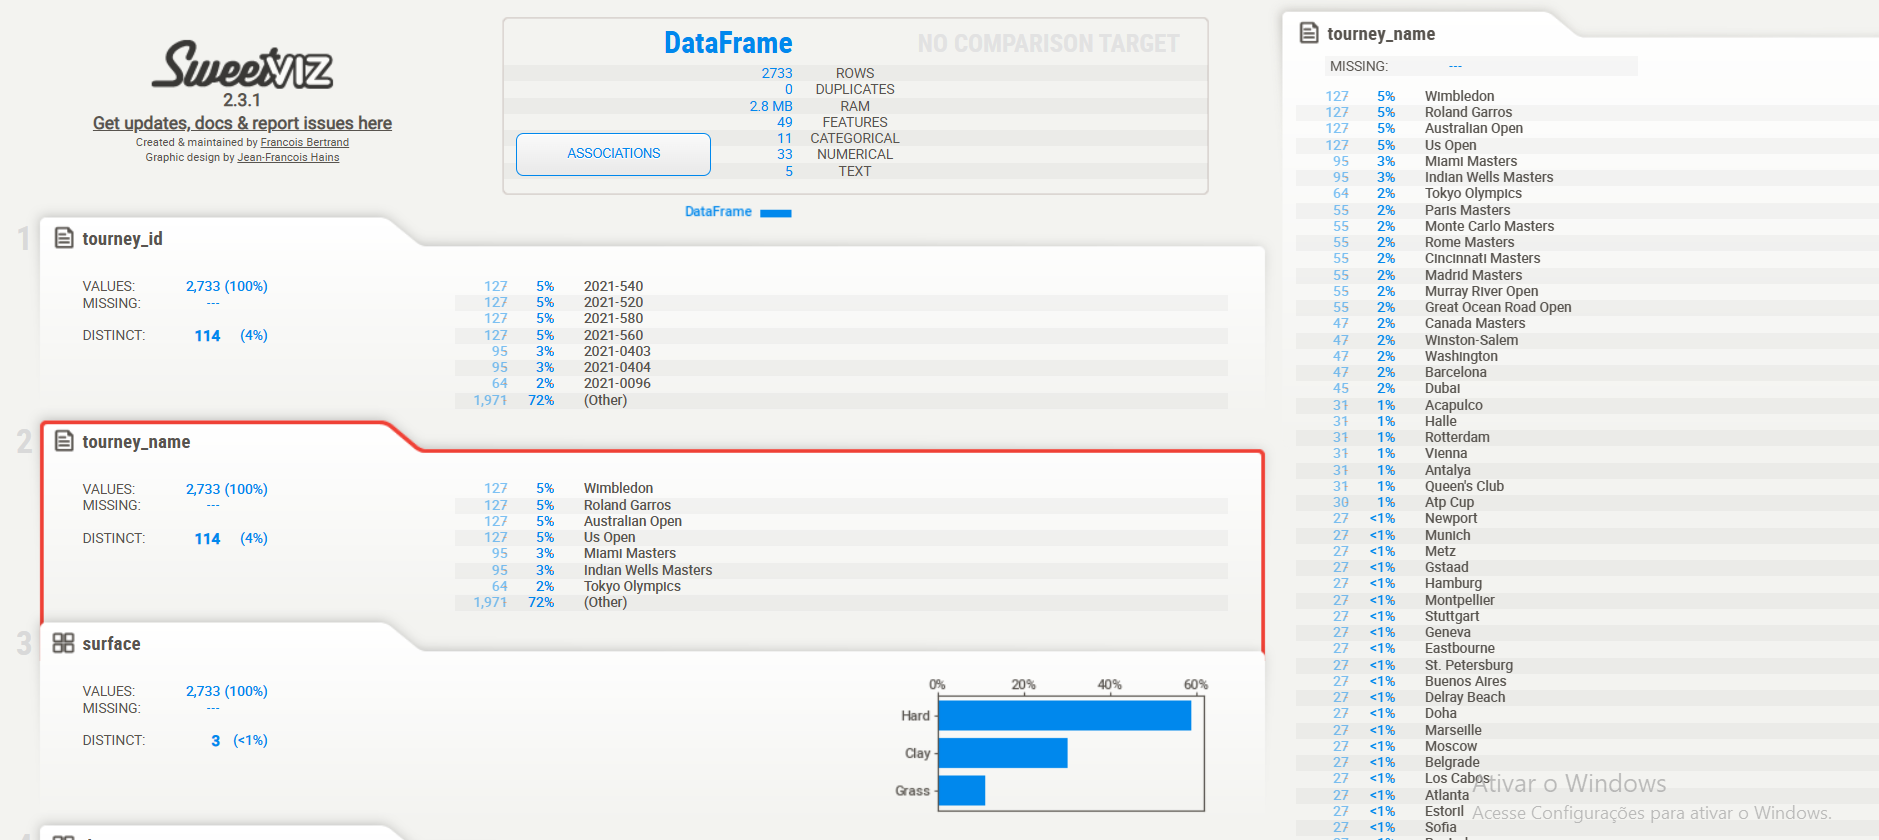

#**Gerando matriz de correlação(de Pearson) de variáveis**

Uma matriz de correlação de Pearson, é uma matriz de correlaçao de váriaveis, onde o coeficiente vai de 1 a -1, e quanto mais próximo do 1: São duas variáveis com correlação perfeita(Quando uma é mais a outra é mais)

Quanto mais próximo do 0 são variáveis sem correlação

Quanto mais próxima do -1 são variáveis com correlação negativa perfeita(Quando uma é mais a outra é menos)

**Removendo colunas não numéricas do DataFrame**

In [20]:
dados = dados.select_dtypes(exclude=['object']) #Por conta de cada coluna do dataframe ser uma series, e as series serem objetos, as colunas com letras
#são descritas com o dtype=object, e não String

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   draw_size           2733 non-null   int64  
 1   tourney_date        2733 non-null   int64  
 2   match_num           2733 non-null   int64  
 3   winner_id           2733 non-null   int64  
 4   winner_seed         1165 non-null   float64
 5   winner_ht           2731 non-null   float64
 6   winner_age          2733 non-null   float64
 7   loser_id            2733 non-null   int64  
 8   loser_seed          693 non-null    float64
 9   loser_ht            2718 non-null   float64
 10  loser_age           2733 non-null   float64
 11  best_of             2733 non-null   int64  
 12  minutes             2650 non-null   float64
 13  w_ace               2636 non-null   float64
 14  w_df                2636 non-null   float64
 15  w_svpt              2636 non-null   float64
 16  w_1stI

In [21]:
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))
#dados.corr() calcula a correlação entre todas as colunas númericas e cria uma matriz espelhada(correlação de 'a'+'b' é a mesma de 'b'+'a'), além da
#diagonal principal (a+a) ser sempre 1.

#np.ones_like cria uma nova matriz do mesma largura e formato que dados.corr(), mas totalmente preenchida com números 1. dtype agora substitui esses
#números 1 matemáticos pelo número 1 booleano(True)

#np.triu() traz os valores no triangulo superior do array(nesse caso valores= True) e valores igual a 0 no triangulo inferior(0 como número matemático, e Falso
#como número booleano)

Esse processo é MUITO importante para criar mapas de calor com a biblioteca Seaborn, pois como a matriz é espelhada, não precisamos ver os dois lados da matriz.Isso elimina informações duplicadas.

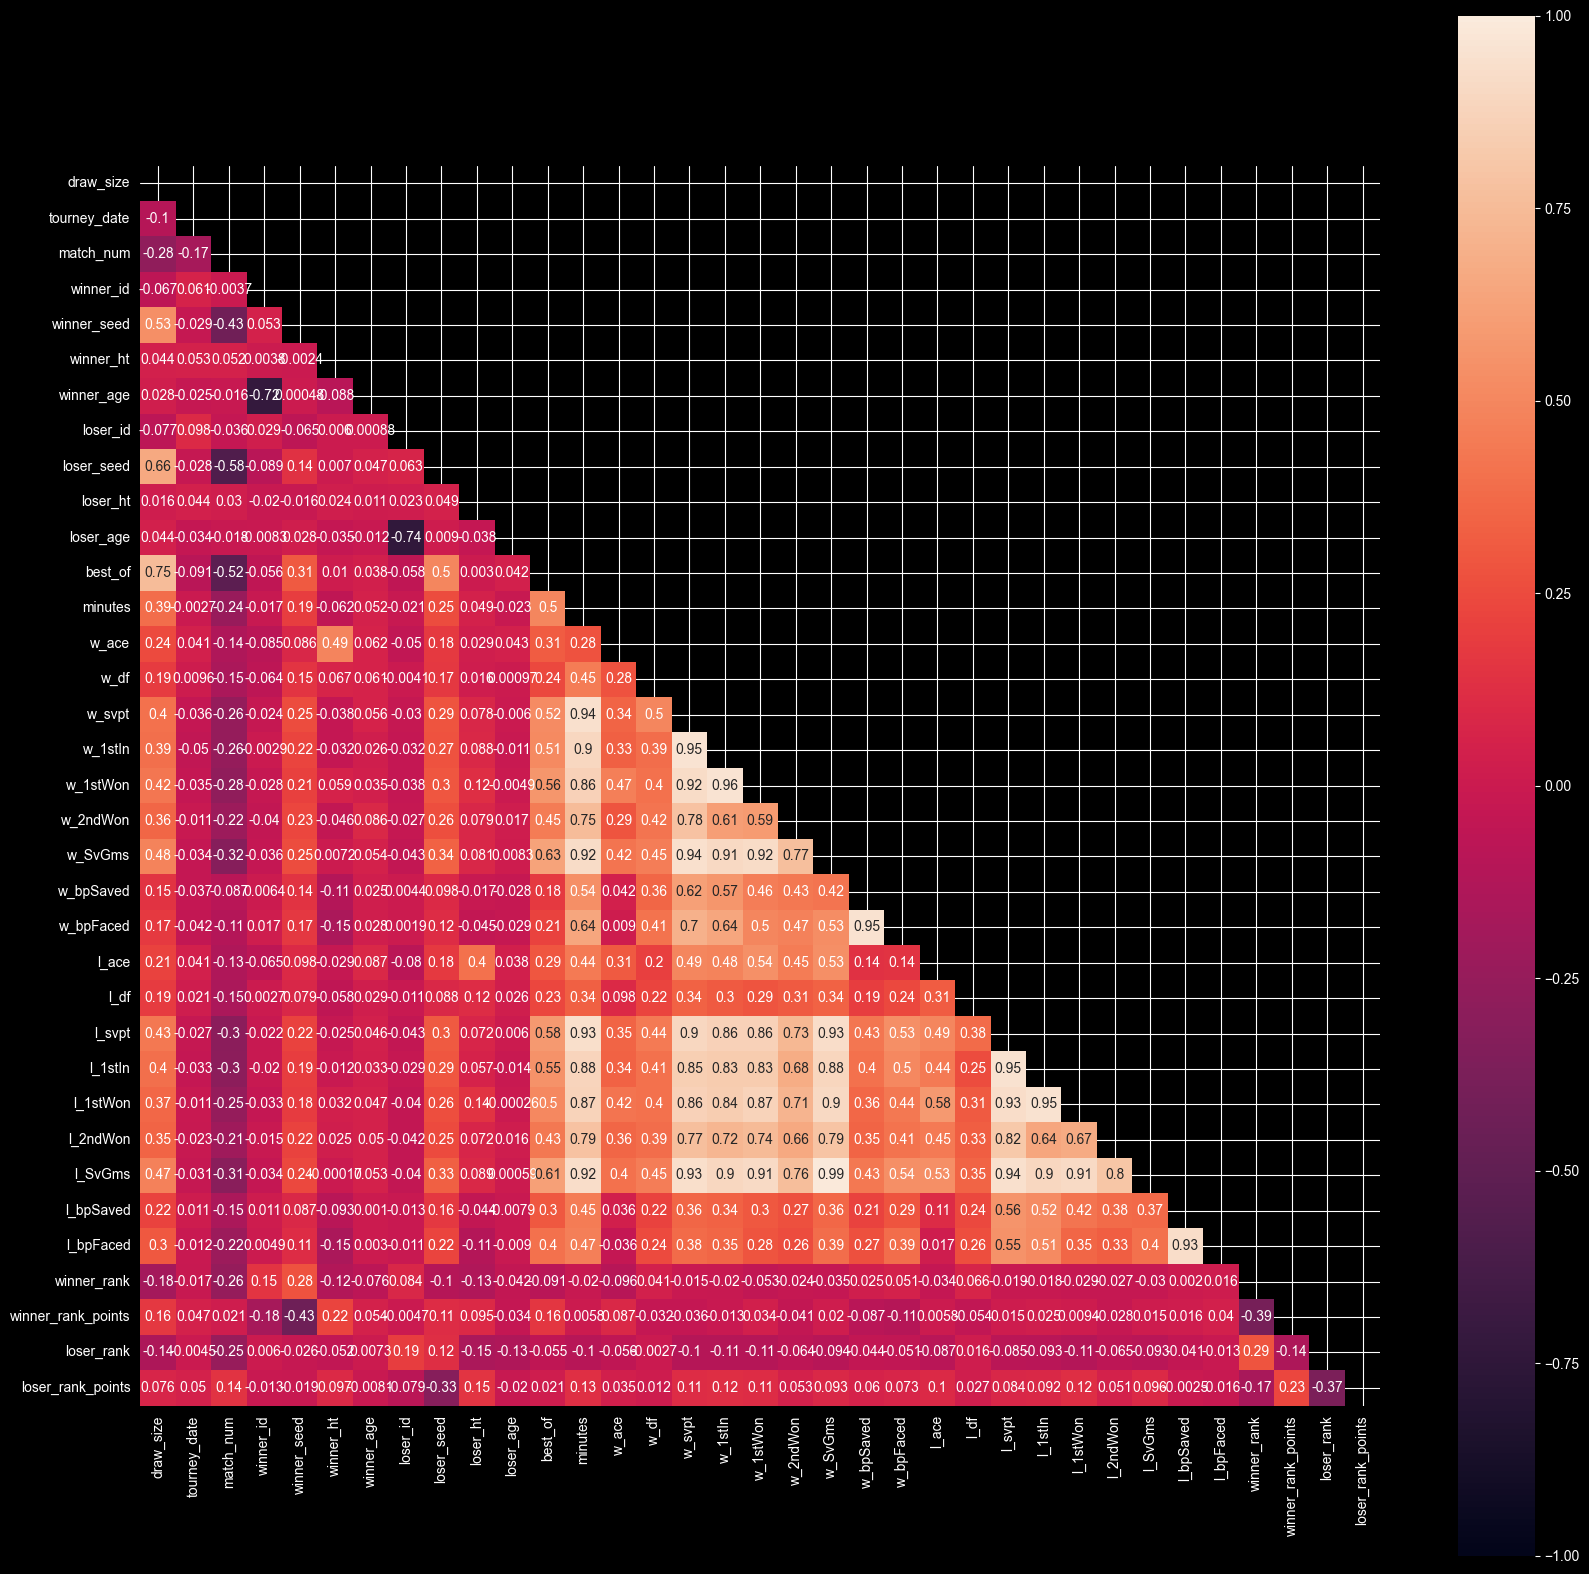

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(dados.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

#dados.corr() contém a correlação dos dados de -1 a 1

#mask= recebe uma matriz booleana, e onde o valor for True, a célula equivalente na variável com valores(dados.corr()) não será exibida. (Nesse caso, a mask
#que a gente criou tem todo o triangulo superior preenchido com True e as células correpondentes em dados.corr() não serã exibidas)


No gráfico observamos algumas correlações, como 'w_svgms'(quantidade de jogos  com saques do vencedor) e 'l_svgms'(quantidades de jogos com saques do perdedor). Isso se dá pois em um jogo de tênis, um saca após o outro, então o número de saques é igual ou MUITO parecido independente de quem venceu a partida.
Esse é um exemplo de dados que não são relevantes para uma análise e poderia ser dropado.

A análise do mapa de calor é muito importante para o EDA.